In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

workers = 16
batches = 10000

mean_arr_time = 1
std_dev = 0.2

def get_job_time(): 
	return np.random.normal(loc=mean_arr_time, scale=std_dev)

def get_worker_timeline(id):
	deltas = [get_job_time() for _ in range(100)]
	return [(id, end_time) for end_time in np.cumsum(deltas)]

In [19]:
timelines = [get_worker_timeline(i) for i in range(workers)]

timeline = [evt for timeline in timelines for evt in timeline]

timeline = sorted(timeline, key=lambda evt: evt[1])

timeline = timeline[:batches]

indices = [[] for _ in range(workers)]

for (idx, (i, t)) in enumerate(timeline):
	indices[i].append(idx)

delays = [[i - 1 for i in np.diff(index_set)] for index_set in indices]

In [20]:
stats = pd.DataFrame(np.concatenate(delays)).describe()
stats

,0
count,1584.000000
mean,14.885101
std,3.451778
min,1.000000
25%,13.000000
50%,15.000000
75%,17.000000
max,26.000000


In [21]:
timeline[-1][1]

104.14858393599519

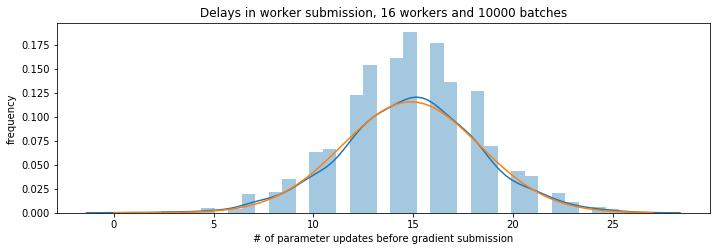

In [41]:
a4_dims = (11.7, 3.5)
fig, ax = plt.subplots(figsize=a4_dims)
sns.distplot(np.concatenate(delays), ax=ax)
x = np.linspace(0, stats[0]["max"] + stats[0]["min"],1000)
y = norm.pdf(x, loc=stats[0]["mean"], scale=stats[0]["std"])
plt.plot(x, y)
plt.title("Delays in worker submission, 16 workers and 10000 batches")
plt.xlabel("# of parameter updates before gradient submission")
plt.ylabel("frequency")
plt.savefig("delays.png")